<a href="https://colab.research.google.com/github/chrisjoly/Python_bootcamp/blob/master/Master_BCH_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCH Tutorial - Classification
For this tutorial we'll be using the Iris dataset from sklearn. 

In this notebook we will:
1. Import required modules and dataset
2. Define multiple Classification models
3. Fit the data to our models
4. Use our trained models to predict a class label 
5. Evaluate our models and chose the best performing model 



In [0]:
#1. Downloading, Installing and Starting Python SciPy

# Check the versions of libraries
# scipy
import scipy

# numpy
import numpy

# scikit-learn
import sklearn

#2. Load The Data

#2.1 Import  Libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
#2.2 Load Dataset

feature_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

dataset = datasets.load_iris()
iris_data = pd.DataFrame(data=dataset.data, columns=feature_names)
target = pd.DataFrame(data=dataset.target, columns=['class'])

display(dataset)

#3. Summarize The Dataset

#3.1 Dimensions of Dataset

print(iris_data.shape)

#3.2 Peek at the Data

print(iris_data.head(20))

#3.3 Statistical Summary

print(iris_data.describe())

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

(150, 4)
    sepal-length  sepal-width  petal-length  petal-width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
14           5.8          4.0           1.2          0.2
15           5.7          4.4           1.5          0.4
16           5.4      

In [0]:
#3.4 Class Distribution

print(target.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


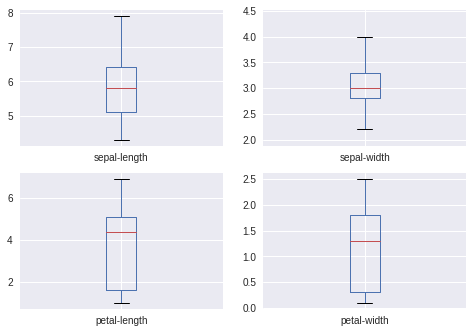

In [0]:
#4. Data Visualization

#4.1 Univariate Plots

# box and whisker plots
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

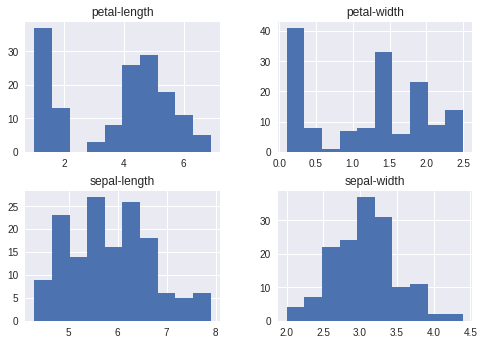

In [0]:
# histograms
iris_data.hist()
plt.show()

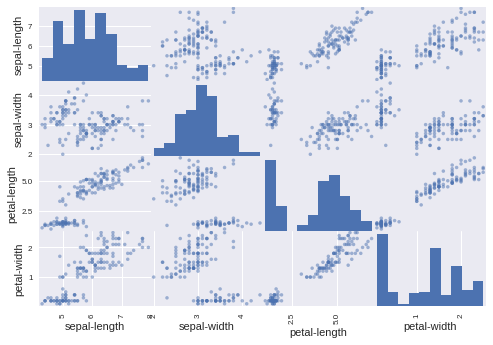

In [0]:
#4.2 Multivariate Plots

# scatter plot matrix
scatter_matrix(iris_data)
plt.show()

In [0]:
#5. Evaluate Some Algorithms

#5.1 Create a Validation Dataset

# Split-out validation dataset
X = iris_data[feature_names].values
Y = target.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)

(120, 4)


In [0]:
#5.2 Test Harness

# Test options and evaluation metric
scoring = 'accuracy'

#5.3 Build Models

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [0]:
# evaluate each model in turn
results = []
results_mean = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  results_mean.append(cv_results.mean())
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


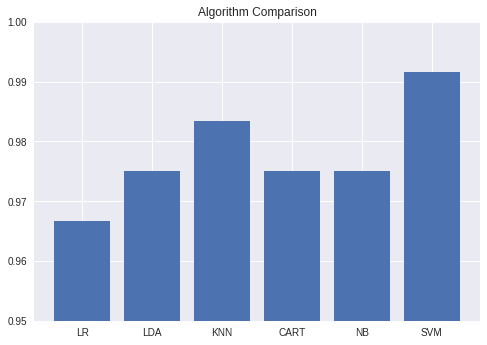

In [0]:
#5.4 Select Best Model

# Compare Algorithms
fig = plt.figure()
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results_mean)
plt.ylim([0.95,1])
ax.set_xticklabels(names)
plt.show()